## Creating random number generator: LCGs

"Illustrate the problem of LCGs projecting into lower-dimensional subspaces by considering a generator with a = 23, c = 0, and modulus = 97. Do two plots of $U_{k}$ vs. $U_{k−1}$,
first showing only 30 points and then showing 96 points. What do these two plots illustrate about the dangers of flawed generators? Do they suggest a possible way of using generators in practice?"

In [1]:
# Declare variables:
a = 23
c = 0
m = 97
# playing around with other numbers below:
# a = 5
# c = 3
# m = 3565

In [2]:
def Xk(n):
    #initialize X0
    if n == 0:
        x = 1 # X0 must be between 0 and m; pick 1 arbitrarily
    else:
        x = (a*Xk(n-1) + c)%m
    return x

def Uk(Xk):
    return Xk/m

In [3]:
r = 30
lstUk = []
lstUkMinus1 = []
for i in range(1,r+1):
    lstUk.append(Uk(Xk(i+1)))
    lstUkMinus1.append(Uk(Xk(i)))

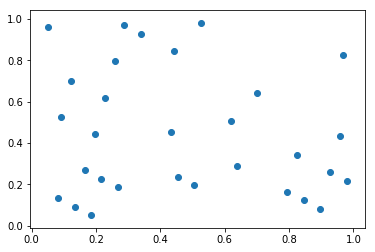

In [4]:
import matplotlib.pyplot as plt
plt.scatter(lstUk,lstUkMinus1)
plt.show()

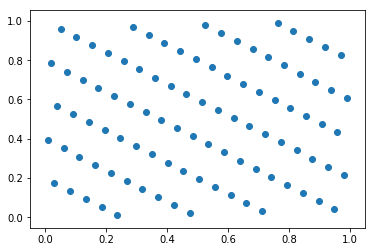

In [5]:
r = 96
lstUk = []
lstUkMinus1 = []
for i in range(1,r+1):
    lstUk.append(Uk(Xk(i+1)))
    lstUkMinus1.append(Uk(Xk(i)))
    
plt.scatter(lstUk,lstUkMinus1)
plt.show()

"What do these two plots illustrate about the dangers of flawed generators?"
- These plots show that there is are several easily-defined relationships between $U_{k}$ and $U_{k-1}$, meaning if we know the value of one of the random numbers, we can predict that the next or the previous random number falls along one of the lines you can see in the graph. If these 8 lines of data points are the only ones, then someone has a 1 in 8 chance of predicting the exact random number given they have enough prior data to solve for regression coefficients.
- Specifically, it violates the "Criteria for Good RNGs" in that it does not satisfy the following: "Be cryptographically strong to external observer: unable to predict next value from past values"

"Do they suggest a possible way of using generators in practice?"
- One should not use the full period of the generator, as seen when r = 30. The values look more random than when you look at the entire period.